In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
pd.set_option('Display.max_rows',None)

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.shape

(200, 5)

In [7]:
df['Unnamed: 0'].nunique() # drop that variable 

200

In [8]:
df.drop('Unnamed: 0',inplace=True, axis=1)

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

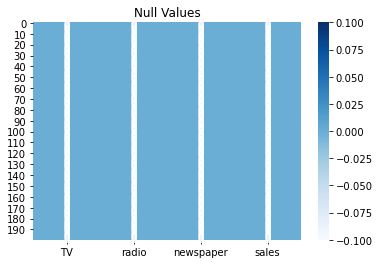

In [11]:
sns.heatmap(df.isnull(),cmap='Blues',annot=True)
plt.title('Null Values')
plt.show()

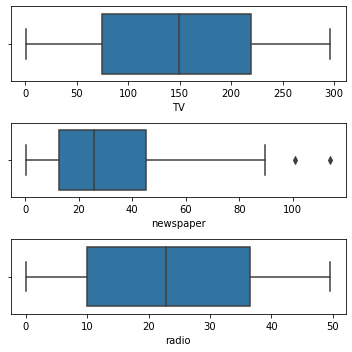

In [12]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

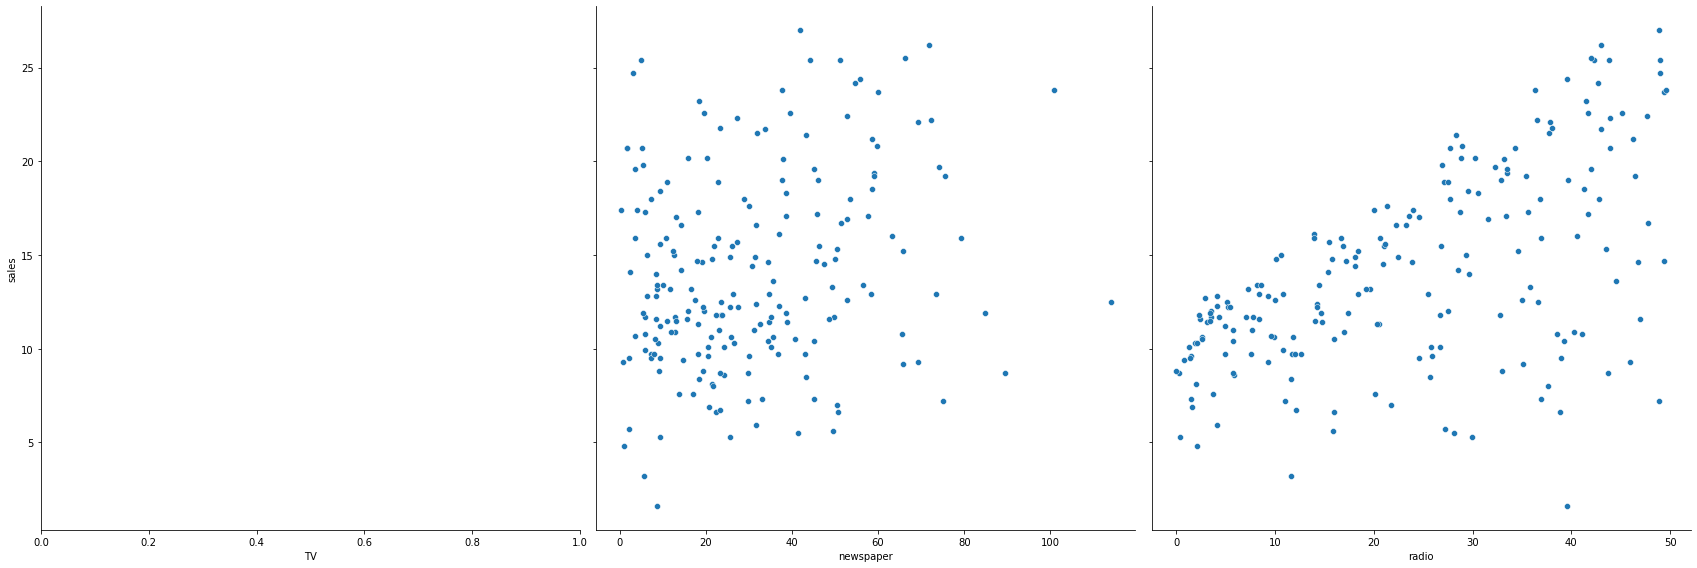

In [13]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=8, aspect=1, kind='scatter')
plt.show()

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

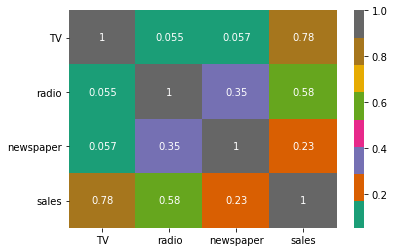

In [15]:
sns.heatmap(df.corr(),cmap='Dark2',annot=True)

In [16]:
X=df['TV']
y=df['sales']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
import statsmodels.api as sm

In [37]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [38]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [39]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           2.84e-30
Time:                        21:20:06   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

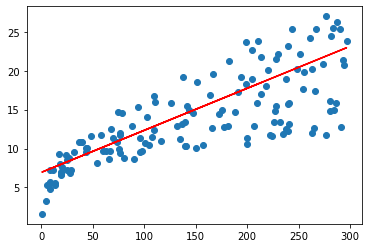

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [42]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

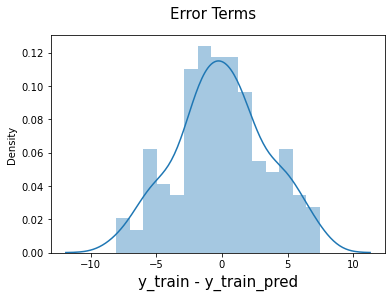

In [43]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()


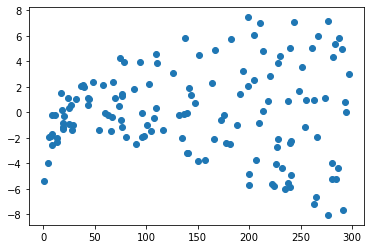

In [44]:
plt.scatter(X_train,res)
plt.show()

In [46]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

y_pred

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
167    16.605320
116    13.462098
96     16.177544
52     17.051694
69     17.070293
164    12.439156
124    17.660810
182     9.602817
154    15.721870
125    11.044236
196    11.369717
194    13.950320
177    14.903516
163    14.591984
31     12.239218
11     16.972649
73     13.006424
15     16.075250
41     15.219698
97     15.587027
128    17.233034
133    17.209785
82     10.490917
139    15.587027
123    12.713491
83     10.170085
65     10.197984
151    12.615846
162    15.749768
170     9.314534
77     12.592598
32     11.509209
173    14.819821
174    17.330678
85     15.972956
168    17.005197
112    15.159252
171    14.638481
181    17.149339
7      12.578648
46     11.160479
75      7.775471
28     18.558209
29     10.272379
195     8.765865
40     16.405381
153    14.954663
115    10.481617
64     13.085470
59     16.786659
1       9.058798
192     7.789420
136     8.179998
152    16.1775

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [49]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

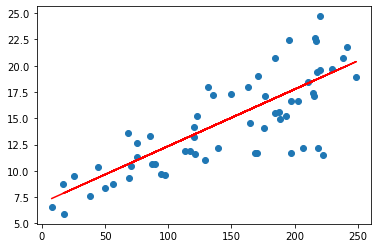

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [51]:
import joblib

In [55]:
joblib.dump(r_squared,'Advertisement.pkl')

['Advertisement.pkl']